### 79546 - Stephen Kipchirchir Ng'etich

Import Modules

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
dataset = pd.read_csv('G:\Work Projects\ml-feature-extraction\PRSA_Data.csv', sep=',')
dataset

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0   
35060  35061  2017      2   28    20   13.0  37.0   7.0  45.0  500.0  81.0   
35061  35062  2017      2   28    21   16.0  37.0  10.0  66.0  700.0  58.0   
35062  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0  35.0   
35063  35064  2017      2   28    23   19.0  31.0  10.0  79.0  600.0  42.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       station  
0      -0.7  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1      -1.1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2      -1.1  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3      -1.4  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4      -2.0  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  
...     ...     ...   ...   ...  ...   ...           ...  
35059  12.5  1013.5 -16.2   0.0   NW   2.4  Aotizhongxin  
35060  11.6  1013.6 -15.1   0.0  WNW   0.9  Aotizhongxin  
35061  10.8  1014.2 -13.3   0.0   NW   1.1  Aotizhongxin  
35062  10.5  1014.4 -12.9   0.0  NNW   1.2  Aotizhongxin  
35063   8.6  1014.1 -15.9   0.0  NNE   1.3  Aotizhongxin  

[35064 rows x 18 columns]

In [37]:
num_row =  dataset[['PM2.5','PM10', 'SO2', 'NO2' , 'CO','O3','TEMP','PRES','RAIN','WSPM']]
print(num_row)

       PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  RAIN  WSPM
0        4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0   0.0   4.4
1        8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2   0.0   4.7
2        7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5   0.0   5.6
3        6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5   0.0   3.1
4        3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2   0.0   2.0
...      ...   ...   ...   ...    ...   ...   ...     ...   ...   ...
35059   12.0  29.0   5.0  35.0  400.0  95.0  12.5  1013.5   0.0   2.4
35060   13.0  37.0   7.0  45.0  500.0  81.0  11.6  1013.6   0.0   0.9
35061   16.0  37.0  10.0  66.0  700.0  58.0  10.8  1014.2   0.0   1.1
35062   21.0  44.0  12.0  87.0  700.0  35.0  10.5  1014.4   0.0   1.2
35063   19.0  31.0  10.0  79.0  600.0  42.0   8.6  1014.1   0.0   1.3

[35064 rows x 10 columns]


### Count Missing values in each column

In [38]:
dataset.head(5)
print(dataset.isnull().sum())

print( )

null_data = dataset[dataset.isnull().any(axis=1)]
sum_null_data_row = dataset.isnull().any(axis = 1).sum()

print(null_data)
print("-----"*10)
print(sum_null_data_row)

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

          No  year  month  day  hour  PM2.5   PM10      SO2       NO2      CO  \
74        75  2013      3    4     2   34.0   62.0      NaN   14.0000   300.0   
75        76  2013      3    4     3   12.0   34.0   6.0000   12.0000     NaN   
76        77  2013      3    4     4    7.0   18.0  14.0000       NaN   400.0   
124      125  2013      3    6     4  192.0  203.0  83.6808  140.4252     NaN   
170      171  2013      3    8     2  339.0  400.0      NaN  162.0000  3899.0   
...      ...   ...    ...  ...   ...    ...    ...      ...       ...     ...   
34912  34913  2017      2   22    16  131.0  131.0      NaN   95.0000     NaN   
34913  34914  2017      2   22    17   28.0   28.0

### Replace the Missing values 

In [39]:
from sklearn.impute import SimpleImputer

# Select all numeric columns using select_dtypes method:
# numeric_columns = dataset.select_dtypes(include='number').columns
numeric_columns = ['PM2.5','PM10', 'SO2', 'NO2' , 'CO','O3','TEMP','PRES','RAIN','WSPM']

#Fill missing values with using the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
dataset[numeric_columns] = pd.DataFrame(imputer.fit_transform(dataset[numeric_columns]), columns=numeric_columns)


# null_data_dewp = [dataset[['DEWP']].isnull().any(axis=1)]
# print("+++"*50)
# null_data_dewp.head(10)

#Forward Fill the values
column = ['wd','DEWP']
dataset[column]= dataset[column].fillna(method='ffill')

#remove decimal point for No,Year,month,day,hour
non_decimal_columns = ['No','year','month','day','hour']
dataset[non_decimal_columns]  = dataset[non_decimal_columns].fillna(0).astype(int) 


dataset.head(10)
dataset.tail(10)

#check if there is missing values
print(dataset.isnull().sum())







No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


### Feature normalization using Z-Score technique

In [40]:
from sklearn.preprocessing import StandardScaler

# copy of datasets
dataset_copy_1= dataset.copy()

#print data types
#print(dataset_copy_1.dtypes)

#select on columns with floating point numbers
dataset_float_columns = dataset_copy_1.select_dtypes(include='float').columns

scale = StandardScaler().fit_transform(dataset[dataset_float_columns])
dataset_z_score = pd.DataFrame(data=scale, columns=dataset_float_columns)
print(dataset_z_score)


          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
0     -0.971987 -1.125409 -0.594053 -1.430285 -0.809141  0.365570 -1.253510   
1     -0.922631 -1.082965 -0.594053 -1.430285 -0.809141  0.365570 -1.288611   
2     -0.934970 -1.093576 -0.549641 -1.348251 -0.809141  0.294746 -1.288611   
3     -0.947309 -1.104187 -0.283168 -1.320906 -0.809141  0.277040 -1.314937   
4     -0.984326 -1.136020 -0.238756 -1.293562 -0.809141  0.277040 -1.367589   
...         ...       ...       ...       ...       ...       ...       ...   
35059 -0.873275 -0.860133 -0.549641 -0.664635 -0.725113  0.684278 -0.095177   
35060 -0.860936 -0.775245 -0.460817 -0.391188 -0.641085  0.436394 -0.174154   
35061 -0.823919 -0.775245 -0.327580  0.183050 -0.473030  0.029155 -0.244356   
35062 -0.762224 -0.700968 -0.238756  0.757287 -0.473030 -0.378083 -0.270682   
35063 -0.786902 -0.838911 -0.327580  0.538530 -0.557058 -0.254141 -0.437412   

           PRES      DEWP      RAIN      WSPM  
0  

### Feature discretization using *Binning* and *Clustering* techniques.


### *Binning* based on the Air quality rating

We use Pandas **_cut()_** function to categorize **PM2.5** variable into 11 [bins]("https://www.aircheckr.com/help-and-guides/air-quality-index"):

[Air Quality Index table](https://www.aircheckr.com/static/media/air-quality-index-table.ccdddd35.png)

In [41]:
dataset['Ratings']=pd.cut(x=dataset['PM2.5'],
 bins=[-np.inf,10,15,20,30,40,50,70,90,100,140,np.inf],
 labels = ['Excellent', 'Good', 'Quite Good', 'Acceptable','Moderate','Insufficient','Rather poor', 'Poor','Bad','Very Bad','Extremely bad'])
print(dataset)


          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1          2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2          3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3          4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4          5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
35059  35060  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0   
35060  35061  2017      2   28    20   13.0  37.0   7.0  45.0  500.0  81.0   
35061  35062  2017      2   28    21   16.0  37.0  10.0  66.0  700.0  58.0   
35062  35063  2017      2   28    22   21.0  44.0  12.0  87.0  700.0  35.0   
35063  35064  2017      2   28    23   19.0  31.0  10.0  79.0  600.0  42.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM       station     Ra

<AxesSubplot:xlabel='PM2.5', ylabel='PM2.5'>

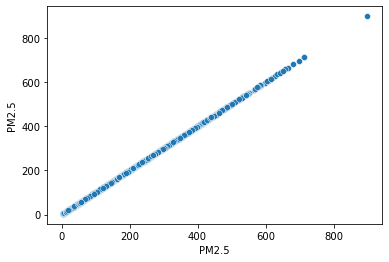

In [42]:
sns.scatterplot(data=dataset, x='PM2.5', y='PM2.5')


       PM2.5  PM10  SO2  NO2   CO   O3  TEMP  PRES  DEWP  RAIN  WSPM
0        0.0   0.0  0.0  0.0  0.0  2.0   1.0   5.0   1.0   0.0   5.0
1        0.0   0.0  0.0  0.0  0.0  2.0   1.0   5.0   1.0   0.0   5.0
2        0.0   0.0  0.0  0.0  0.0  2.0   1.0   6.0   1.0   0.0   6.0
3        0.0   0.0  0.0  0.0  0.0  2.0   1.0   6.0   0.0   0.0   3.0
4        0.0   0.0  1.0  0.0  0.0  2.0   1.0   6.0   0.0   0.0   2.0
...      ...   ...  ...  ...  ...  ...   ...   ...   ...   ...   ...
35059    0.0   0.0  0.0  1.0  0.0  3.0   4.0   4.0   1.0   0.0   2.0
35060    0.0   0.0  0.0  1.0  0.0  2.0   3.0   4.0   1.0   0.0   0.0
35061    0.0   0.0  0.0  2.0  0.0  1.0   3.0   4.0   1.0   0.0   1.0
35062    0.0   0.0  1.0  3.0  0.0  1.0   3.0   4.0   2.0   0.0   1.0
35063    0.0   0.0  0.0  3.0  0.0  1.0   3.0   4.0   1.0   0.0   1.0

[35064 rows x 11 columns]


<AxesSubplot:xlabel='PM2.5', ylabel='PM2.5'>

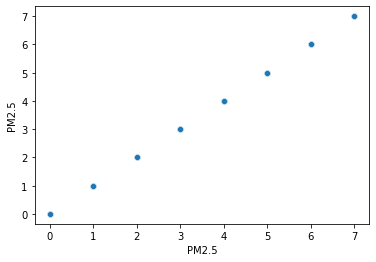

In [43]:

from sklearn.preprocessing import KBinsDiscretizer


# create the discretizer object with strategy quantile and 8 bins
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans') 

# fit the discretizer to the train set
discretizer.fit(dataset[dataset_float_columns])

# apply the discretisation
X_cluster = discretizer.transform(dataset[dataset_float_columns])

X_cluster = pd.DataFrame(data=X_cluster, columns=dataset_float_columns)

print()
print(X_cluster)

sns.scatterplot(data=X_cluster, x='PM2.5', y='PM2.5')
